In [ ]:
pip install pandas requests pymongo matplotlib seaborn

In [15]:
import pandas as pd

# Load sales data from CSV
sales_data = pd.read_csv('sales_data.csv')
print(sales_data.head())  # Display the first few rows


   order_id  customer_id  product_id  quantity  price  order_date
0      2334            5          40         3  35.60  2022-06-21
1      6228            8          13         7  36.52  2023-03-08
2      7784            9          44         4  46.56  2023-04-22
3      6588            5          26         1  15.87  2022-10-23
4      5910            8          32        10  77.00  2022-10-05


In [16]:
import requests

def fetch_user_data():
    response = requests.get("https://jsonplaceholder.typicode.com/users")
    if response.status_code == 200:
        users = pd.DataFrame(response.json())
        # Extracting latitude and longitude from the address
        users['lat'] = users['address'].apply(lambda x: x['geo']['lat'])
        users['lng'] = users['address'].apply(lambda x: x['geo']['lng'])
        return users[['id', 'name', 'username', 'email', 'lat', 'lng']]
    else:
        raise Exception("Failed to fetch user data")

users_data = fetch_user_data()
print(users_data.head())  # Display the first few rows


   id              name   username                      email       lat  \
0   1     Leanne Graham       Bret          Sincere@april.biz  -37.3159   
1   2      Ervin Howell  Antonette          Shanna@melissa.tv  -43.9509   
2   3  Clementine Bauch   Samantha         Nathan@yesenia.net  -68.6102   
3   4  Patricia Lebsack   Karianne  Julianne.OConner@kory.org   29.4572   
4   5  Chelsey Dietrich     Kamren   Lucio_Hettinger@annie.ca  -31.8129   

         lng  
0    81.1496  
1   -34.4618  
2   -47.0653  
3  -164.2990  
4    62.5342  


In [17]:
def fetch_weather_data(lat, lon):
    api_key = "e0c3e6e238e6108f7f3f4325cad5fa9d"
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        weather = response.json()
        city = weather.get('name', None)
        if city:
            return {"city": city}
        else:
            print(f"No city found for coordinates: lat={lat}, lon={lon}")
            return {"city": "Unknown"}
    else:
        print(f"Failed to fetch weather data for coordinates: lat={lat}, lon={lon}, status_code: {response.status_code}")
        return {"city": "Unknown"}


In [18]:
# Apply function and create a new column for city
users_data['city'] = users_data.apply(
    lambda row: fetch_weather_data(row['lat'], row['lng'])['city'], axis=1
)

# Display the updated DataFrame
print(users_data[['id', 'city']].head())


No city found for coordinates: lat=-37.3159, lon=81.1496
No city found for coordinates: lat=-43.9509, lon=-34.4618
No city found for coordinates: lat=-68.6102, lon=-47.0653
No city found for coordinates: lat=29.4572, lon=-164.2990
No city found for coordinates: lat=-31.8129, lon=62.5342
No city found for coordinates: lat=-71.4197, lon=71.7478
No city found for coordinates: lat=24.8918, lon=21.8984
No city found for coordinates: lat=-14.3990, lon=-120.7677
No city found for coordinates: lat=24.6463, lon=-168.8889
No city found for coordinates: lat=-38.2386, lon=57.2232
   id     city
0   1  Unknown
1   2  Unknown
2   3  Unknown
3   4  Unknown
4   5  Unknown


In [21]:
# Total sales amount per customer
total_sales_per_customer = merged_data.groupby('customer_id')['price'].sum()

# Average order quantity per product
average_order_quantity = merged_data.groupby('product_id')['quantity'].mean()

# Top-selling products
top_selling_products = merged_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False)

print("Total Sales Per Customer:\n", total_sales_per_customer.head())
print("\nAverage Order Quantity Per Product:\n", average_order_quantity.head())
print("\nTop Selling Products:\n", top_selling_products.head())


Total Sales Per Customer:
 customer_id
1    4307.43
2    5948.32
3    5391.75
4    5144.84
5    5801.88
Name: price, dtype: float64

Average Order Quantity Per Product:
 product_id
1    5.000000
2    5.916667
3    6.307692
4    6.750000
5    5.000000
Name: quantity, dtype: float64

Top Selling Products:
 product_id
11    181
36    159
23    156
26    155
44    151
Name: quantity, dtype: int64


In [20]:
# Merge sales data with user data
merged_data = pd.merge(sales_data, users_data, left_on='customer_id', right_on='id')

# Insert the merged data into MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client.sales_database
collection = db.collection

collection.delete_many({})  # Clear existing data
collection.insert_many(merged_data.to_dict('records'))


InsertManyResult([ObjectId('65634b3582d5cd83216dd77d'), ObjectId('65634b3582d5cd83216dd77e'), ObjectId('65634b3582d5cd83216dd77f'), ObjectId('65634b3582d5cd83216dd780'), ObjectId('65634b3582d5cd83216dd781'), ObjectId('65634b3582d5cd83216dd782'), ObjectId('65634b3582d5cd83216dd783'), ObjectId('65634b3582d5cd83216dd784'), ObjectId('65634b3582d5cd83216dd785'), ObjectId('65634b3582d5cd83216dd786'), ObjectId('65634b3582d5cd83216dd787'), ObjectId('65634b3582d5cd83216dd788'), ObjectId('65634b3582d5cd83216dd789'), ObjectId('65634b3582d5cd83216dd78a'), ObjectId('65634b3582d5cd83216dd78b'), ObjectId('65634b3582d5cd83216dd78c'), ObjectId('65634b3582d5cd83216dd78d'), ObjectId('65634b3582d5cd83216dd78e'), ObjectId('65634b3582d5cd83216dd78f'), ObjectId('65634b3582d5cd83216dd790'), ObjectId('65634b3582d5cd83216dd791'), ObjectId('65634b3582d5cd83216dd792'), ObjectId('65634b3582d5cd83216dd793'), ObjectId('65634b3582d5cd83216dd794'), ObjectId('65634b3582d5cd83216dd795'), ObjectId('65634b3582d5cd83216dd7

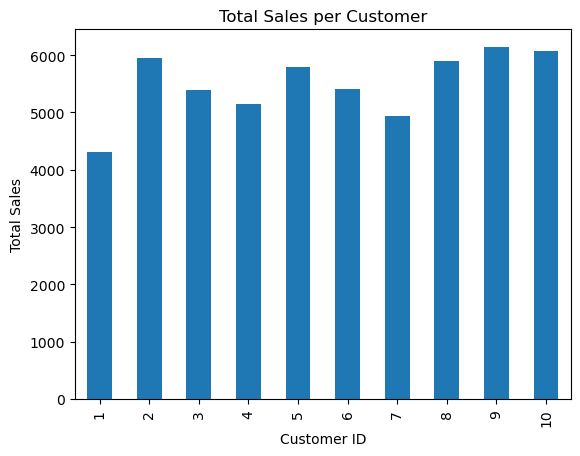

In [8]:
import matplotlib.pyplot as plt

total_sales_per_customer.plot(kind='bar')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.title('Total Sales per Customer')
plt.show()


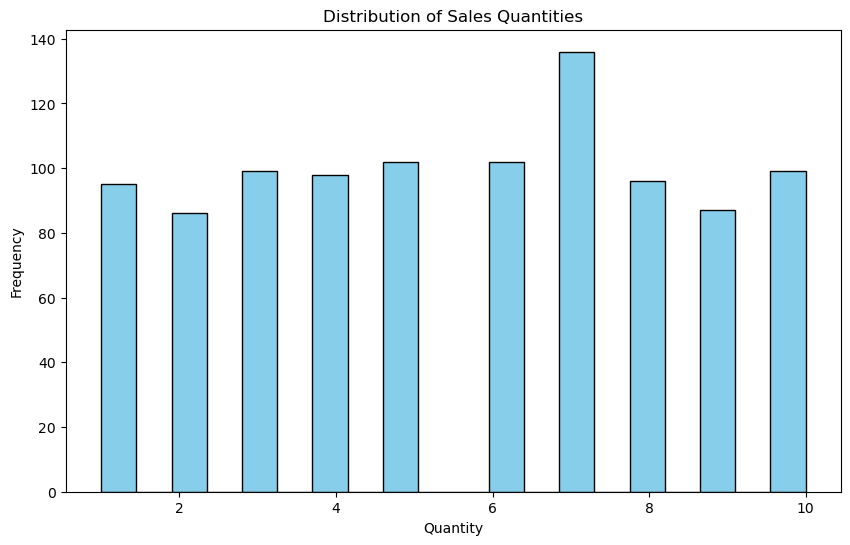

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(sales_data['quantity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


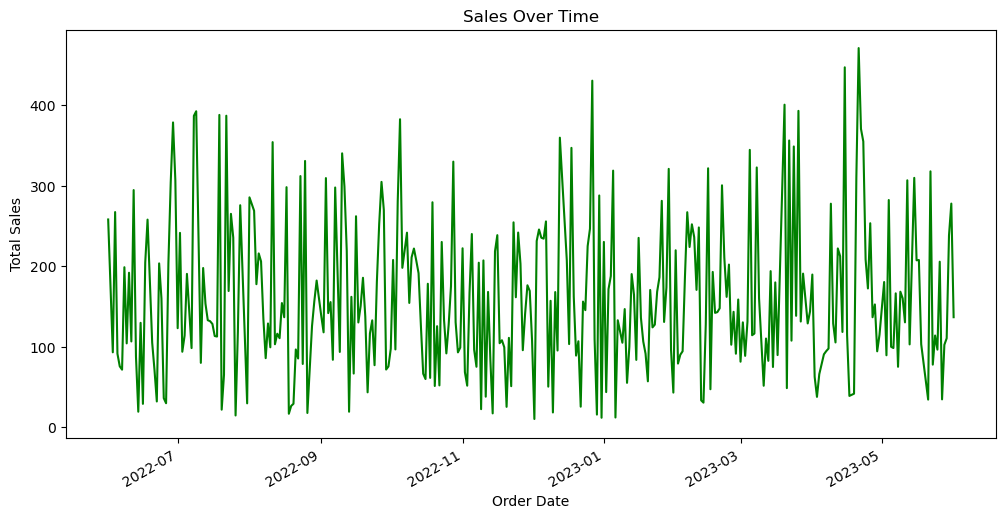

In [23]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
sales_over_time = sales_data.groupby('order_date')['price'].sum()

plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line', color='green')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()


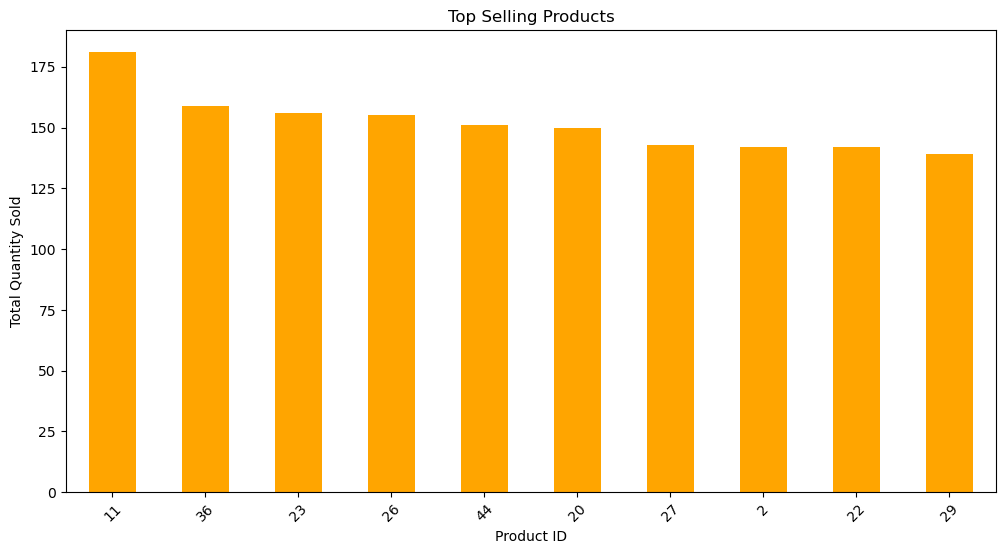

In [24]:
top_selling_products = sales_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='orange')
plt.title('Top Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


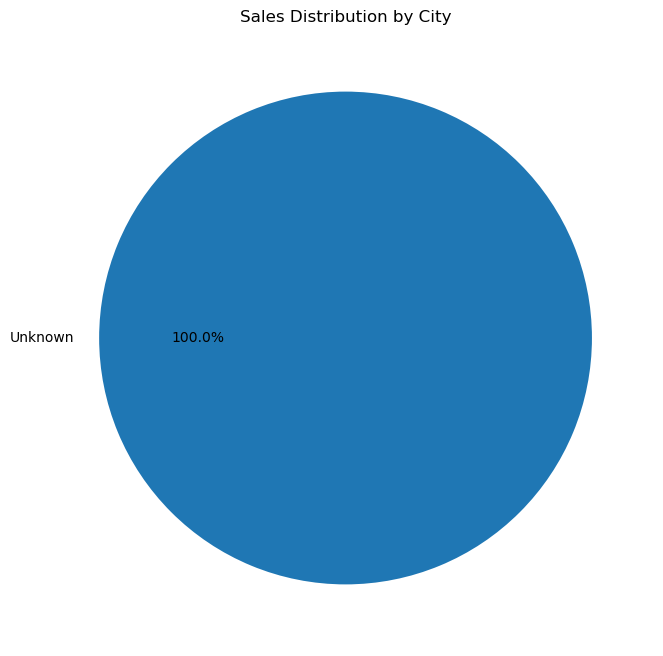

In [25]:
sales_by_city = merged_data.groupby('city')['price'].sum()

plt.figure(figsize=(10, 8))
sales_by_city.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by City')
plt.ylabel('')
plt.show()


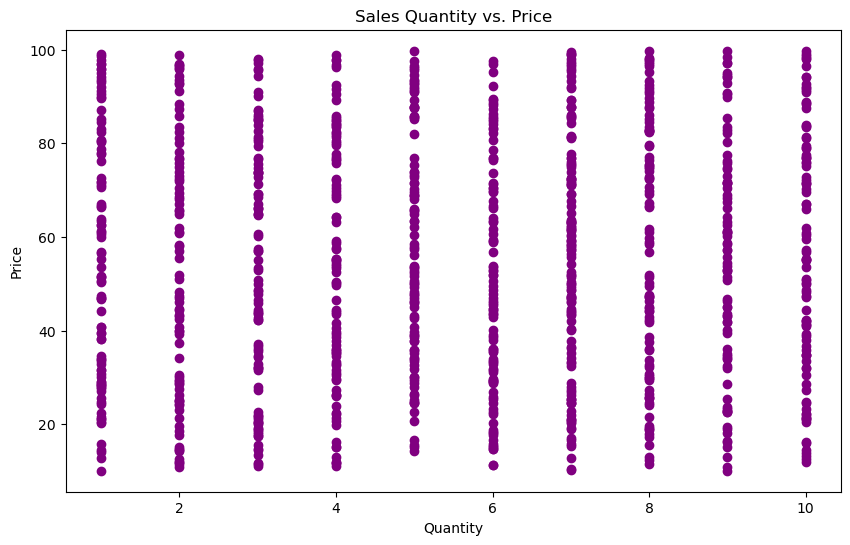

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(sales_data['quantity'], sales_data['price'], color='purple')
plt.title('Sales Quantity vs. Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()
